### TensorFlow 2.x
* 개념
    * 텐서플로우 2.0 버전은 1.x 버전과 비교하면 먼저 즉시 실행 모드라고 불리는 Eager Execution모드가 적용되어서 코드의 직관성이 매우 높아졌으며, 사용자 친화적이어서 개발자들이 쉽게 배울 수 있는 케라스(Keras)만을 High-Level API로 공식적으로 지원한다.

In [6]:
import tensorflow as tf
import numpy as np

a = tf.constant(10)
b = tf.constant(20)
c = a + b
d = (a + b).numpy() #numpy 값을 반환

print('type c:',type(c))
print('c:',c)
print('type d:',type(d))
print('d:',d)
d_numpy_to_tensor = tf.convert_to_tensor(d)

print(type(d_numpy_to_tensor))
print(d_numpy_to_tensor)


type c: <class 'tensorflow.python.framework.ops.EagerTensor'>
c: tf.Tensor(30, shape=(), dtype=int32)
type d: <class 'numpy.int32'>
d: 30
<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(30, shape=(), dtype=int32)


### 케라스(Keras)
* 케라스를 직접 프로그램에 임포트 시켜 사용하는 native keras 보다는 텐서플로우 2.0을 이용한, 즉 tensorflow.keras 라이브러리를 임포트 시켜서 프로그래밍 하는 것을 적극적으로 권장하고 있다.
* 모델(model)
    * 케라스 기본 아키텍처인 모델 개념도
        - 케라스의 기본 아키텍처는 모델을 기반으로 입력 층, 다수의 은닉 층 그리고 출력 층으로 구성되어 있으며 피드 포워드(feed forward)를 통해서 데이터를 전파하고 오차 역전파 알고리즘을 이용하여 가중치와 bias를 최적의 값으로 업데이트 하는 과정이라고 할 수 있다.
        - 모델이라는 것은 인공 신경망 자체를 나타낸다고 볼 수 있으며, 모든 모델의 기본 단위는 층(layer)으로 구성 되어 있다. 이러한 층을 레고 블록처럼 순차적으로 쌓기만 하면 일반 신경망(ANN), 합성곱 신경망(CNN) 그리고 순환 신경망(RNN) 또는 이들을 다영하게 조합한 아키텍처를 구성하는 것이 가능하다.

* 케라스 구조와 기본 API
    * 케라스 모델은 인공적인 신경망 자체를 나타내고 있음 : model = Sequential()
    * 모든 모델의 기본단위는 층(layer)이며 레고 블럭처럼 쌓을 수 있음 : model.add()

In [8]:
# 케라스를 이용한 선형회귀 예제

# 라이브러리 임포트 및 학습 데이터 정의
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np

x_data = np.array([1,2,3,4,5,6])
y_data = np.array([3,4,5,6,7,8])
print(tf.__version__)


2.10.0


In [10]:
#모델(model) 구축
model = Sequential() # 모델
model.add(Flatten(input_shape=(1,))) # 입력층(1차원을 입력함)
model.add(Dense(1, activation='linear')) # 출력층
# activation(활성함수)는 linear로 설정함, 이진분류면 sigmoid, 다중분류면 softmax

#모델 컴파일 및 summary
#확률적 경사하강법인 SGD 를 옵티마이저로 설정
model.compile(optimizer=SGD(learning_rate=1e-2), loss = 'mse') #손실값계산은 mse(min squre error(평균제곱합))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 모델 학습
hist = model.fit(x_data, y_data, epochs=1000)

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 3s 3s/step - loss: 11.2191
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 5.5284
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 2.8921
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 1.6695
Epoch 5/1000
1/1 [==============================] - 0s 5ms/ste

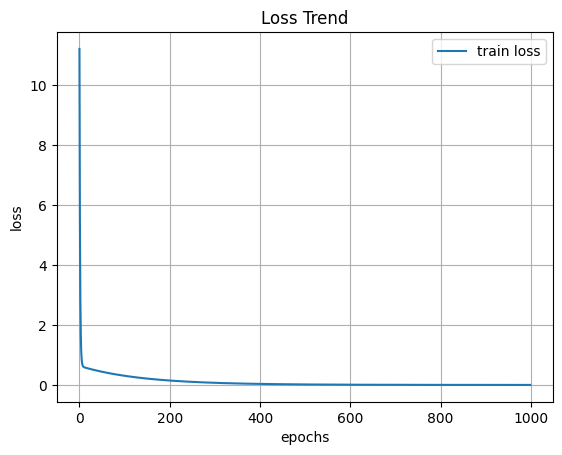

In [15]:
from cProfile import label
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss') #hist의 loss 값, hist.history는 epoch마다 loss값을 알 수 있음
plt.legend(loc='best')

plt.show()

In [12]:
# 모델 평가 및 예측
result = model.predict(np.array([-3.1, 3.0, 3.5, 15.0, 20.1]))
print(result)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 49ms/step
[[-1.1808327]
 [ 4.9859695]
 [ 5.491445 ]
 [17.117384 ]
 [22.273233 ]]


In [16]:
#모델 저장
model.save('test.pkl')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [2]:
#모델 불러오기
import tensorflow as tf
import numpy as np
new_load_model = tf.keras.models.load_model('test.pkl')

In [3]:
new_load_model.predict(np.array([-3.1, 3.0, 3.5, 15.0, 20.1]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 48ms/step


array([[-1.1808327],
       [ 4.9859695],
       [ 5.491445 ],
       [17.117384 ],
       [22.273233 ]], dtype=float32)